# Challenge 1: Binary Detection 1

The first step is to import relevant libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
start = time.clock()

The second step is to import data from the given file.

In [3]:
df = pd.DataFrame.from_csv("1challenge.csv")
df0 = df.loc[df['label'] == 1.0]
df1 = df.loc[df['label'] == 0.0]
dftest = df.loc[~((df['label'] == 0.0) | (df['label'] == 1.0))]
print(df0.shape)
print(df1.shape)
print(dftest.shape)

(4000, 3)
(6000, 3)
(5000, 3)


One can use the data in their original Pandas DataFrame format, or one can transform these objects into Numpy-arrays.

In [4]:
TrainingData0 = df0.as_matrix(columns=None)
TrainingData1 = df1.as_matrix(columns=None)
TestData = dftest.as_matrix(columns=['Y0', 'Y1'])

It may be helpful to visualize the data.

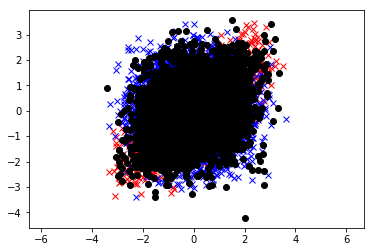

In [5]:
plt.figure(1)
plt.plot(TrainingData0[:,0], TrainingData0[:,1], 'x', color='r')
plt.plot(TrainingData1[:,0], TrainingData1[:,1], 'x', color='b')
plt.plot(TestData[:,0], TestData[:,1], 'o', color='k')
plt.axis('equal')
plt.show()

In [6]:
trainSet=np.append(TrainingData0,TrainingData1,axis=0)
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=1)

In [7]:
# -----------------train the set------------------
model.fit(trainSet[:,0:2], trainSet[:,2])
predictedSet=np.zeros((5000,1))    #set the original set
predictedSet[:,0]= model.predict(TestData)
testResult=np.append(TestData,predictedSet,axis=1)
Array=np.append(trainSet,testResult,axis=0)

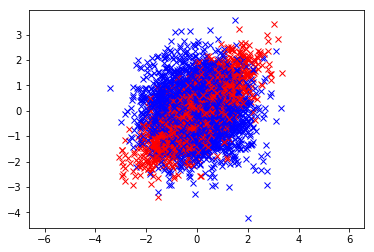

In [8]:
#---------------print the result---------------------
plt.figure(2)
for i in range (len(testResult)):
    if (testResult[i,2]==0):
        plt.plot(testResult[i,0],testResult[i,1],'x',color='b')
    else:
        plt.plot(testResult[i,0],testResult[i,1],'x',color='r')
plt.axis('equal')
plt.show()

In [9]:
#--------------calculate the time--------------------
elapsed = (time.clock() - start)
print("Time used:",elapsed)
dfnew=pd.DataFrame({'Y0':Array[:,0],'Y1':Array[:,1],'label':Array[:,2]})
dfnew.to_csv("1challenge.csv")


Time used: 66.46717632909146
